# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
%cd '/content/drive/MyDrive/NLP100knock2024/chapter07/'

/content/drive/MyDrive/NLP100knock2024/chapter07


## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [ ]:
from gensim.models import KeyedVectors
import pickle

model = KeyedVectors.load_word2vec_format(
    "GoogleNews-vectors-negative300.bin.gz", binary=True)

with open("word2vec.pkl", "wb") as f:
    pickle.dump(model, f)

print(model["United_States"])

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

## 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ

In [ ]:
print(model.similarity("United_States", "U.S."))

0.73107743


## 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [ ]:
print(model.most_similar("United_States"))

[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370987892151), ('United_Sates', 0.7400724291801453), ('U.S.', 0.7310774326324463), ('theUnited_States', 0.6404393911361694), ('America', 0.6178410053253174), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.601906955242157)]


## 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．



In [ ]:
print(model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10))

[('Greece', 0.6898480653762817), ('Aristeidis_Grigoriadis', 0.560684859752655), ('Ioannis_Drymonakos', 0.5552908778190613), ('Greeks', 0.545068621635437), ('Ioannis_Christou', 0.5400862097740173), ('Hrysopiyi_Devetzi', 0.5248445272445679), ('Heraklio', 0.5207759737968445), ('Athens_Greece', 0.516880989074707), ('Lithuania', 0.5166865587234497), ('Iraklion', 0.5146791338920593)]


## 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [ ]:
from tqdm import tqdm
input = './questions-words.txt'
output = './questions-words_similarity.txt'

# tqdm用のtotal数を先に調べておく
total = 0
with open(input, 'r', encoding='utf-8') as f:
    for row in f:
        total += 1

category = ''
with open(input, 'r', encoding='utf-8') as f1, \
        open(output, 'w', encoding='utf-8') as f2:
    for row in tqdm(f1, total=total):
        #:から始まる行の2列目にカテゴリーが入っている。
        if row.startswith(':'):
            category = row.rstrip()[2:]
            continue
        else:
            #スペースごとに分割
            cols = row.rstrip().split()
            #vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)の類似度が最も高い単語を取得
            word, similarity = model.most_similar(positive=[cols[1], cols[2]], negative=[cols[0]], topn=1)[0]
            #タブ区切りで出力
            f2.write('{}\t{}\t{}\t{}\n'.format(category, row.rstrip(), word, similarity))

100%|██████████| 19558/19558 [2:27:53<00:00,  2.20it/s]


## 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [ ]:
sem_cnt = 0
sem_true = 0
syn_cnt = 0
syn_true = 0
with open(output, 'r', encoding='utf-8') as f:
    for row in f:
        cols = row.strip().split('\t')
        target = cols[1].split()[-1] #vec（4列目の単語）
        pred = cols[2] #最も類似度の高い単語
        #意味的アナロジー
        if not cols[0].startswith('gram'):
            sem_cnt += 1
            if target == pred:
                sem_true += 1
        #文法的アナロジー
        else:
            syn_cnt += 1
            if target == pred:
                syn_true += 1
print('意味的アナロジーの正解率: {}'.format(sem_true / sem_cnt))
print('文法的アナロジーの正解率: {}'.format(syn_true / syn_cnt))

意味的アナロジーの正解率: 0.7308602999210734
文法的アナロジーの正解率: 0.7400468384074942


## 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．



In [ ]:
!wget --no-check-certificate http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2024-06-17 05:18:12--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 173.236.137.139
Connecting to www.gabrilovich.com (www.gabrilovich.com)|173.236.137.139|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [following]
--2024-06-17 05:18:12--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 173.236.137.139
Connecting to gabrilovich.com (gabrilovich.com)|173.236.137.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip.1’

wordsim353.zip.1    100%[===================>]  22.71K  --.-KB/s    in 0.02s   

2024-06-17 05:18:12 (1.41 MB/s) - ‘wordsim353.zip.1’ saved [23257/23257]

Archive:  wordsim353.zip
replace combined.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  i

In [ ]:
from scipy.stats import spearmanr

file = './combined.csv'
human = []
w2v = []
with open(file, 'r', encoding='utf-8') as f:
    next(f)
    for row in f:
        cols = row.rstrip().split(',')
        human.append(float(cols[2])) #3列目に人間の類似度
        w2v.append(model.similarity(cols[0], cols[1])) #1,2列目にそれぞれ単語

correlation, pvalue = spearmanr(human, w2v)

print('スピアマン相関係数: {}'.format(correlation))

スピアマン相関係数: 0.7000166486272194


## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ.

In [ ]:
#国名に関する単語ベクトルをquestions-words_similarity.txtより抽出
file = './questions-words_similarity.txt'
categories1 = ['capital-common-countries', 'capital-world']
categories2 = ['currency', 'gram6-nationality-adjective']
countries = set() #重複を消す
with open(file, 'r', encoding='utf-8') as f:
    for row in f:
        cols = row.strip().split('\t')
        if cols[0] in categories1:
            country = cols[1].split()[1]
            countries.add(country)
        elif cols[0] in categories2:
            country = cols[1].split()[0]
            countries.add(country)
        else:
            continue

countries = list(countries)

print(len(countries))
print(countries)

# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]

129
['Morocco', 'Spain', 'Chile', 'Samoa', 'Honduras', 'Romania', 'Vietnam', 'Rwanda', 'Algeria', 'Jordan', 'Afghanistan', 'Qatar', 'Malta', 'Finland', 'Eritrea', 'Nigeria', 'Brazil', 'Oman', 'Namibia', 'USA', 'Egypt', 'Nicaragua', 'Switzerland', 'Burundi', 'Mali', 'Bahamas', 'Greenland', 'Montenegro', 'Estonia', 'Italy', 'Austria', 'Tajikistan', 'Malawi', 'Liberia', 'Ghana', 'Ireland', 'Poland', 'Armenia', 'France', 'Jamaica', 'Moldova', 'Turkey', 'Tunisia', 'Iceland', 'Mexico', 'Fiji', 'Denmark', 'Venezuela', 'Macedonia', 'Taiwan', 'Netherlands', 'Belarus', 'Dominica', 'Philippines', 'Laos', 'Belize', 'Nepal', 'Gambia', 'Georgia', 'Iraq', 'Somalia', 'Korea', 'Kyrgyzstan', 'Belgium', 'Bahrain', 'Bulgaria', 'Argentina', 'Serbia', 'Turkmenistan', 'Guinea', 'Liechtenstein', 'Bhutan', 'Guyana', 'Mozambique', 'Zimbabwe', 'Azerbaijan', 'Cambodia', 'Russia', 'Malaysia', 'Greece', 'Uruguay', 'Croatia', 'Sweden', 'Lebanon', 'Niger', 'Canada', 'China', 'Ukraine', 'Norway', 'Australia', 'Banglad

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Romania, Montenegro, Estonia, Tajikistan, Poland, Armenia, Moldova, Turkey, Macedonia, Belarus, Georgia, Kyrgyzstan, Bulgaria, Serbia, Turkmenistan, Azerbaijan, Russia, Greece, Croatia, Ukraine, Hungary, Lithuania, Latvia, Slovenia, Albania, Cyprus, Uzbekistan, Kazakhstan, Slovakia
cluster 1
Vietnam, Jordan, Afghanistan, Qatar, Oman, Egypt, Fiji, Taiwan, Philippines, Laos, Nepal, Iraq, Korea, Bahrain, Bhutan, Cambodia, Malaysia, Lebanon, China, Australia, Bangladesh, Syria, Pakistan, Tuvalu, Libya, Japan, Indonesia, India, Iran, Thailand, Israel
cluster 2
Morocco, Spain, Samoa, Malta, Finland, Brazil, USA, Switzerland, Greenland, Italy, Austria, Ireland, France, Iceland, Denmark, Netherlands, Belgium, Argentina, Liechtenstein, Uruguay, Sweden, Canada, Norway, England, Germany, Europe, Portugal
cluster 3
Rwanda, Algeria, Eritrea, Nigeria, Namibia, Burundi, Mali, Malawi, Liberia, Ghana, Tunisia, Gambia, Somalia, Guinea, Mozambique, Zimbabwe, Niger, Mauritania, Gabon, Madagascar

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

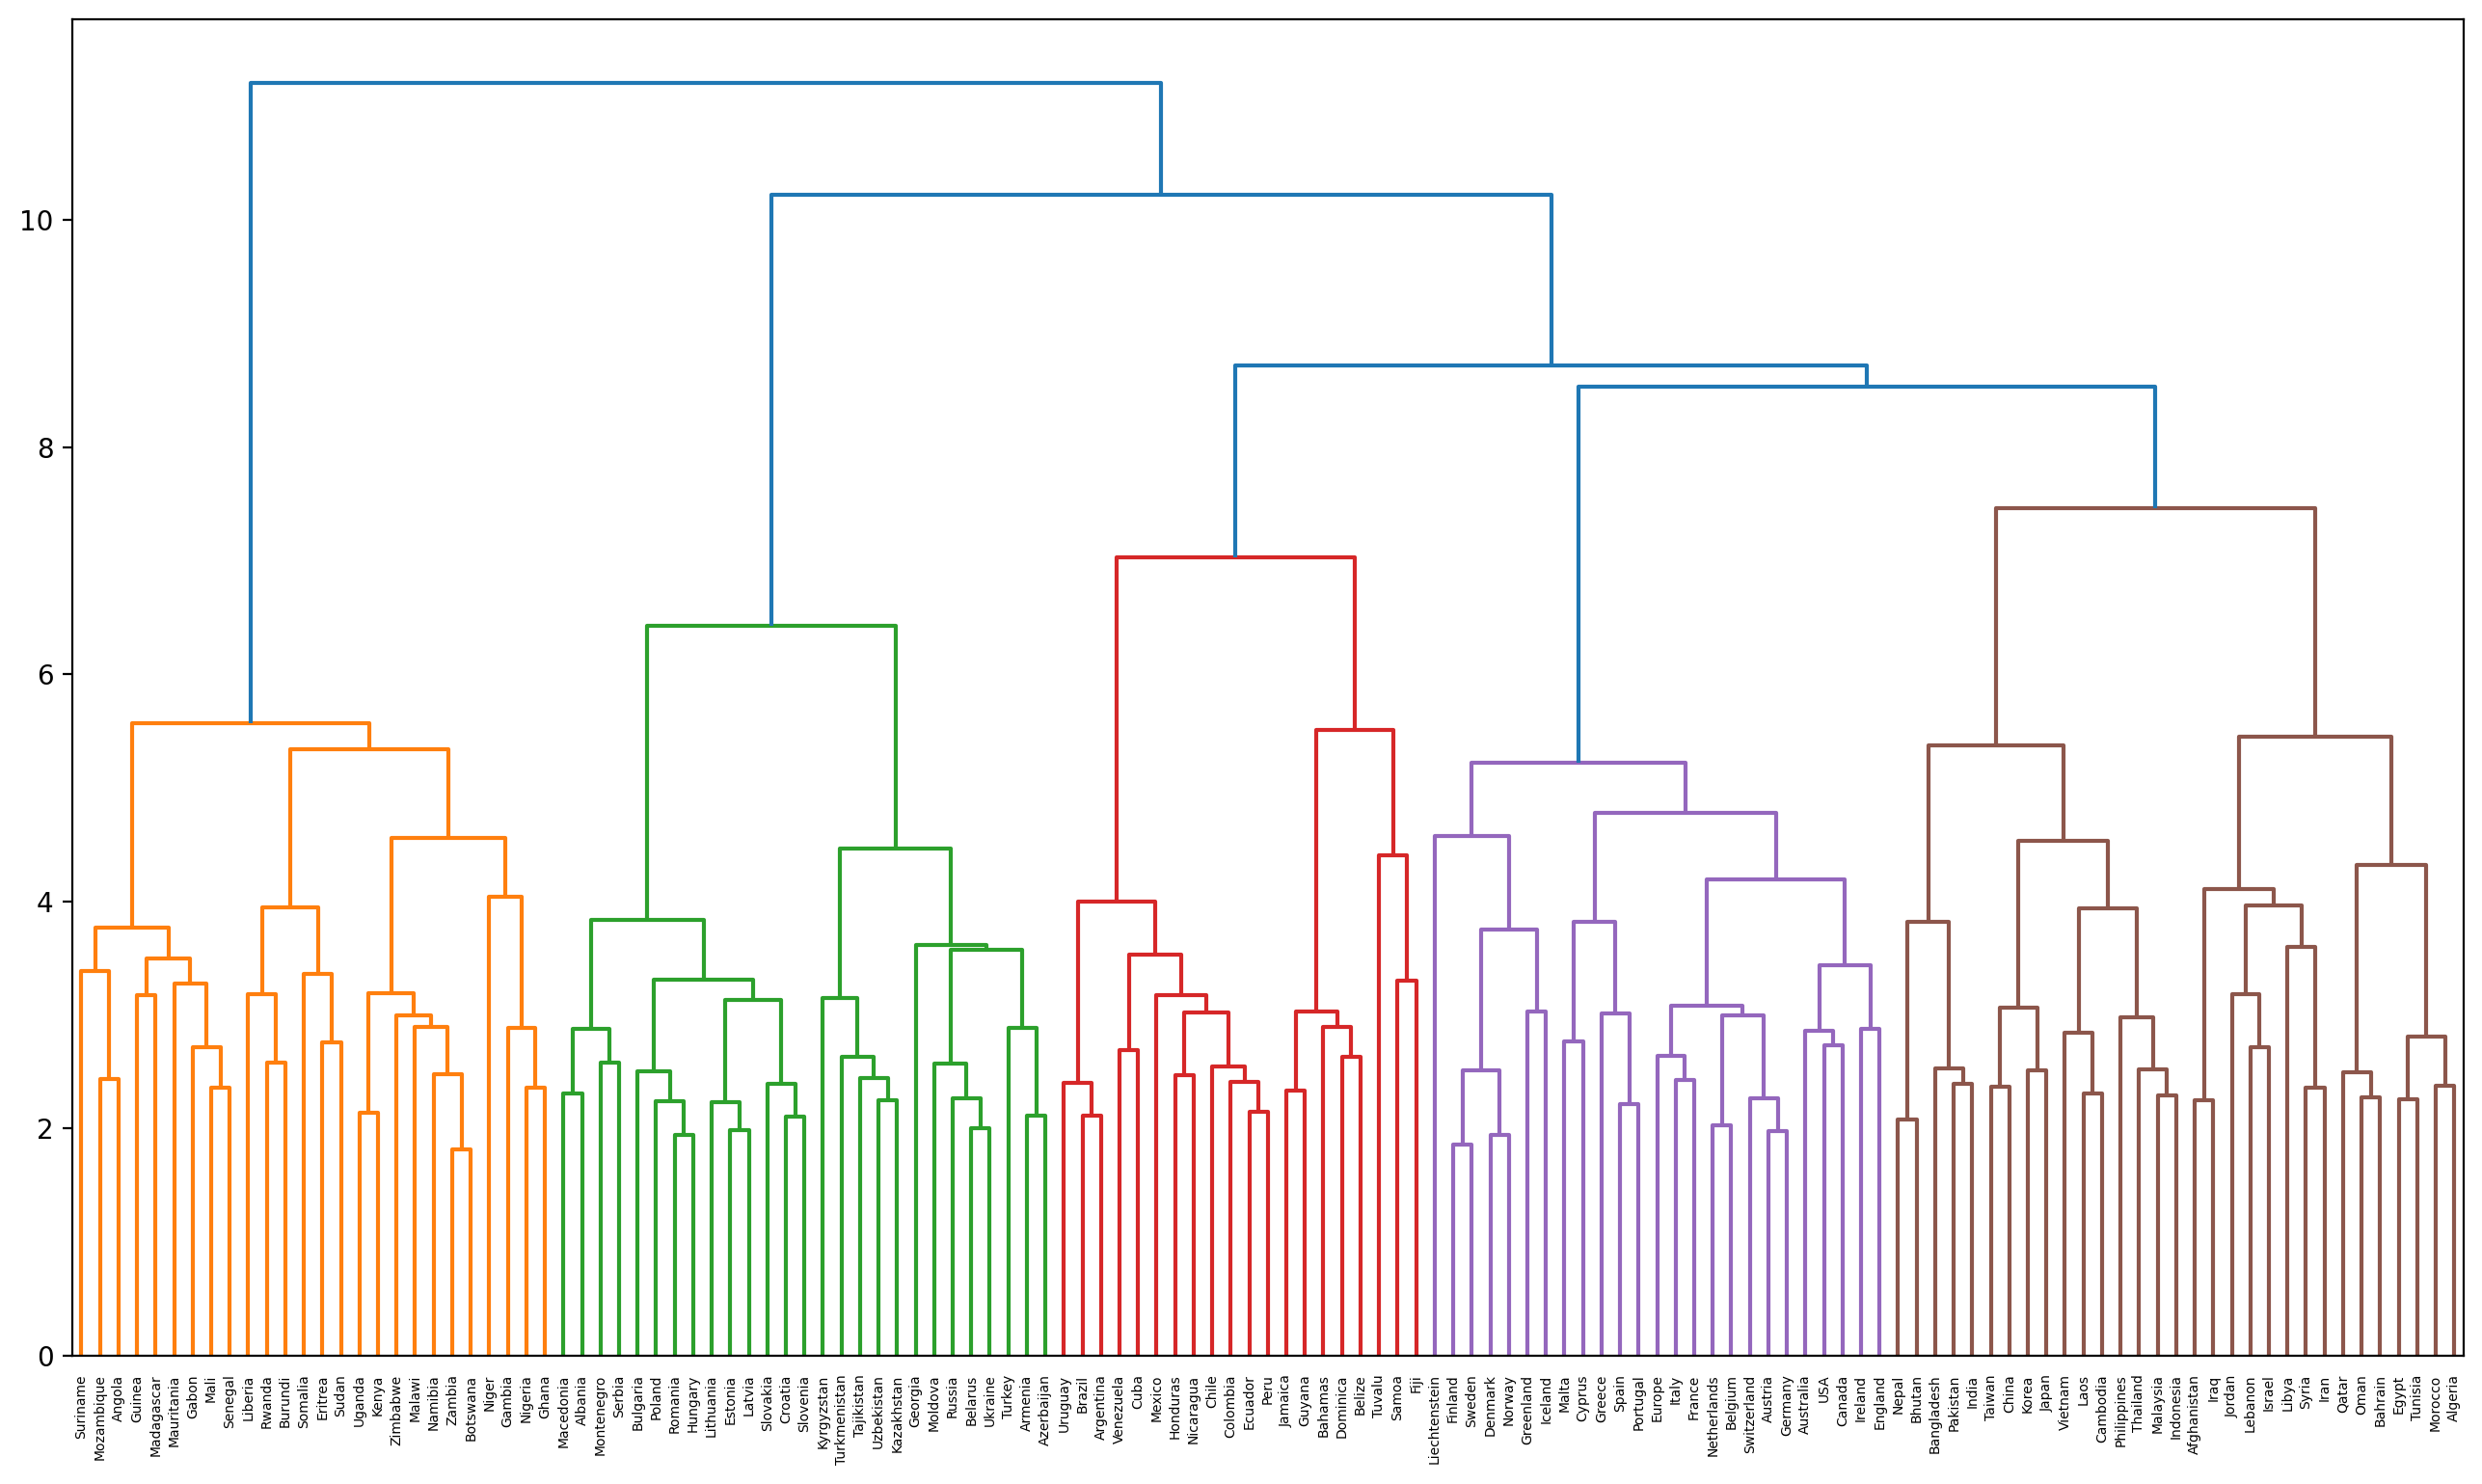

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

#国名の単語ベクトルをlinkage階層型クラスタリングを作成
#融合はウォード法、距離はユークリッド距離を指定
linkage_result = linkage(countries_vec, method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=countries) #国名をラベルに
plt.savefig("68.png")

## 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

In [ ]:
from sklearn.manifold import TSNE
#t-SNEは高次元データを2次元又は3次元に変換して可視化するための次元削減アルゴリズム

tsne = TSNE(n_components=2, random_state=42, n_iter=15000)
embs = tsne.fit_transform(np.array(countries_vec))

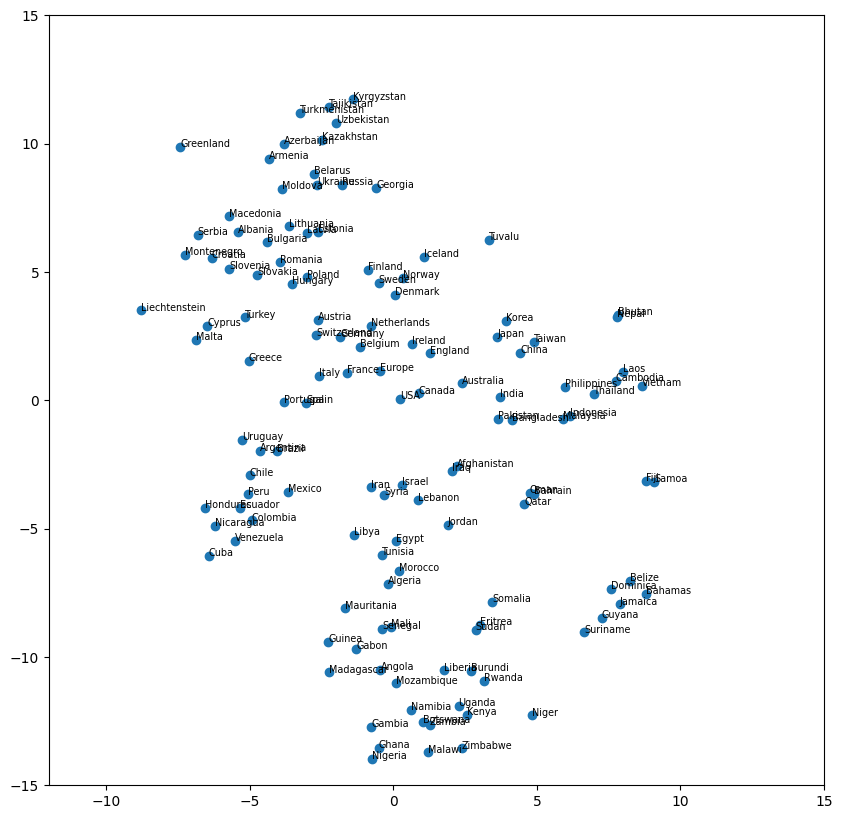

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize =(10, 10))
plt.scatter(np.array(embs).T[0], np.array(embs).T[1])
for (x, y), name in zip(embs, countries):
  plt.annotate(name, (x, y), size ='x-small')
plt.xlim([-12, 15])
plt.ylim([-15, 15])
plt.show()
plt.savefig('69.png')

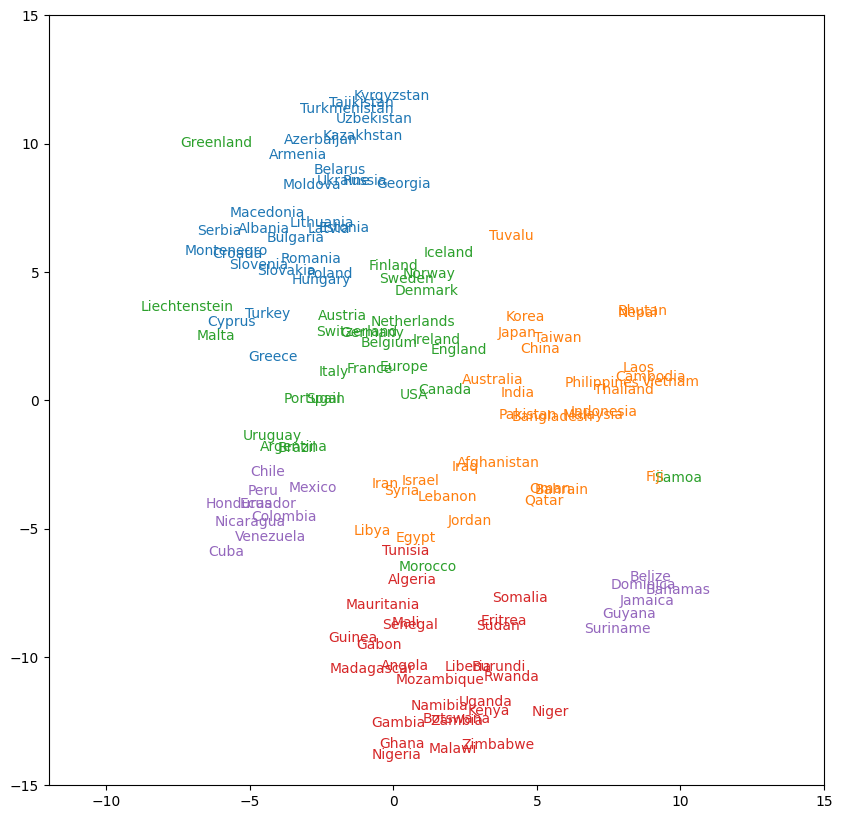

In [ ]:
#クラスタごとに色付け
plt.figure(figsize=(10, 10))
for x, country, color in zip(embs, countries, kmeans.labels_):
    plt.text(x[0], x[1], country, color='C{}'.format(color))
plt.xlim([-12, 15])
plt.ylim([-15, 15])
plt.show()